In [1]:
# Import necessary libraries
from selenium import webdriver  # for web scraping using a browser
from bs4 import BeautifulSoup  # for parsing HTML content
import pandas as pd  # for data manipulation and handling
import time  # for adding delays in code execution
from tqdm import tqdm  # for displaying progress bars

In [2]:
# Initialize a Chrome WebDriver instance
browser = webdriver.Chrome()

In [3]:
# Prompt the user to input a YouTube channel name
channelName = input("Please enter a YouTube channel: ")

In [4]:
# Construct a Google search link for the input channel name
link = 'https://www.google.com/search?q=' + channelName + ' youtube'

In [5]:
# Open the constructed link in the browser
browser.get(link)

In [6]:
# Parse the HTML content of the page
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [7]:
# Extract the link of the first search result (which is assumed to be the channel link)
for i in soup.find_all('div', class_='MjjYud'):
    link = i.find('a').get('href')
    break

In [8]:
# Open the channel's videos page in the browser
browser.get(link + '/' + 'videos')

In [9]:
# Parse the HTML content of the page
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [10]:
# Scroll down the page to load more videos dynamically
for i in tqdm(range(0, 5000, 1000)):
    browser.execute_script('window.scrollTo(0,' + str(i) + ')')
    time.sleep(0.1)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00,  9.35it/s]


In [11]:
# Parse the HTML content of the page after scrolling
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [12]:
# Find all video items on the page
video_items = soup.find_all('ytd-rich-item-renderer')

In [13]:
# Iterate over each video item and extract relevant information
data = []
for item in video_items:
    link = "https://www.youtube.com/" + item.find('a', class_='yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').get('href')
    title = item.find('a', class_='yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media').get('title')
    views = (item.find('span', class_="inline-metadata-item style-scope ytd-video-meta-block").text.split(" ")[0])
    upload_time = (item.find_all('span', class_="inline-metadata-item style-scope ytd-video-meta-block")[1].text)
    data.append([link, title, views, upload_time])

In [14]:
# Save the DataFrame to a CSV file with the channel name as filename
df=pd.DataFrame(data,columns=['Link','Title','Views','UploadTime'])

df.to_csv(channelName + '.csv', index=False)

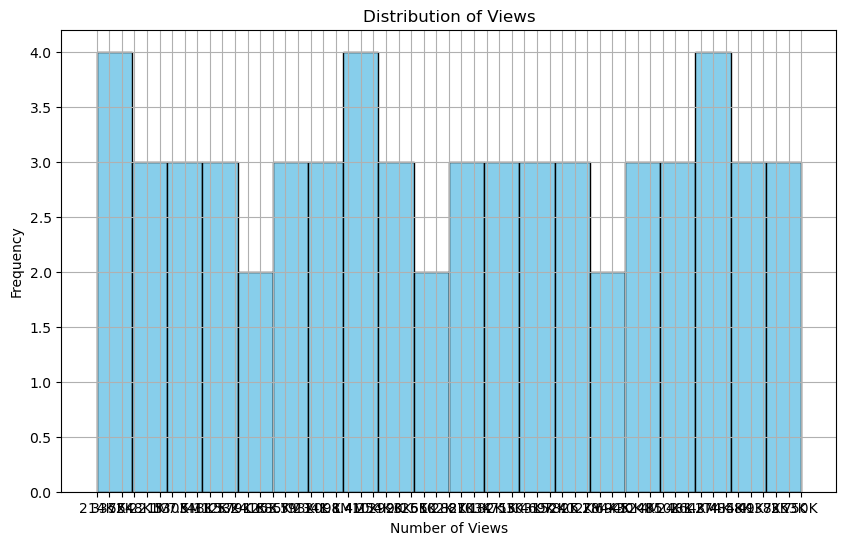

In [15]:
import matplotlib.pyplot as plt  # for visualization

# Plot a histogram of views
plt.figure(figsize=(10, 6))
plt.hist(df['Views'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
data

[['https://www.youtube.com//watch?v=28DtDOGF3eg',
  "Russell's Dramatic Crash! | The Top 10 Onboards | 2024 Australian Grand Prix | Qatar Airways",
  '214K',
  '17 hours ago'],
 ['https://www.youtube.com//watch?v=hOsCKttB7IA',
  '11 Times F1 Winning Streaks Ended',
  '337K',
  '19 hours ago'],
 ['https://www.youtube.com//watch?v=aYL_Akcbn2w',
  'What Next For Sensational Sainz? | 2024 Australian GP Review | F1 Nation Podcast',
  '52K',
  '1 day ago'],
 ['https://www.youtube.com//watch?v=bYfc9NN5baU',
  'Sainz Glory, Verstappen Chaos And The Best Team Radio | 2024 Australian Grand Prix | Paramount+',
  '548K',
  '1 day ago'],
 ['https://www.youtube.com//watch?v=PZnDUIipakU',
  "Carlos Sainz's AMAZING Recovery | From Hospital Bed To Race Winner In JUST 16 days!",
  '221K',
  '1 day ago'],
 ['https://www.youtube.com//watch?v=GZntP127WTI',
  "Drivers' Reaction After the Race | 2024 Australian Grand Prix",
  '1M',
  '3 days ago'],
 ['https://www.youtube.com//watch?v=hxbrSEXgF1Q',
  'Verstap

In [1]:
import psycopg2

try:
    
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname="youtube_videos",
        user="postgres",
        password="",
        host="localhost",
        port="5432",
    )
except Exception as e:
    print(e)
    exit(0)

if conn is not None:
    print("Connection established to PostgreSQL.")

    # Create a cursor object
    cur = conn.cursor()

    # Create a table if it doesn't exist
    cur.execute(
        """
        CREATE TABLE IF NOT EXISTS youtube_videos (
            id SERIAL PRIMARY KEY,
            link VARCHAR,
            title VARCHAR,
            views VARCHAR,
            upload_time VARCHAR
        )
    """
    )

    # Insert data into the table
    for row in data:
        cur.execute(
            """
            INSERT INTO youtube_videos (link, title, views, upload_time)
            VALUES (%s, %s, %s, %s)
        """,
            row,
        )

    # Commit the transaction
    conn.commit()

    print("Data inserted successfully.")

    # Close the cursor and connection
    if cur:
        cur.close()
    if conn:
        conn.close()

else:
    print("Connection to PostgreSQL FAILED.")

connection to server at "localhost" (::1), port 5432 failed: FATAL:  database "youtube_videos" does not exist



NameError: name 'conn' is not defined

: 